In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/gld_price_data.csv')
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
df.shape

(2290, 6)

In [ ]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing value found")

No missing value found


In [ ]:
for column in df.columns:
    print(column,df[column].nunique())

Date 2290
SPX 2277
GLD 1930
USO 1514
SLV 1331
EUR/USD 2066


In [ ]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['GLD']))]
categorical_features

['Date']

In [ ]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is Date and number of categories are 2290


In [ ]:
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['GLD']))]
print('Number of numerical variables: ', len(numerical_features))

df[numerical_features].head()

Number of numerical variables:  4


,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [ ]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


In [ ]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['GOD']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 4


<ipython-input-13-15cdf9fee607>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[continuous_feature])
<ipython-input-13-15cdf9fee607>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[continuous_feature])
<ipython-input-13-15cdf9fee607>:5: UserWarning: 

`distplot` is a deprecated function 

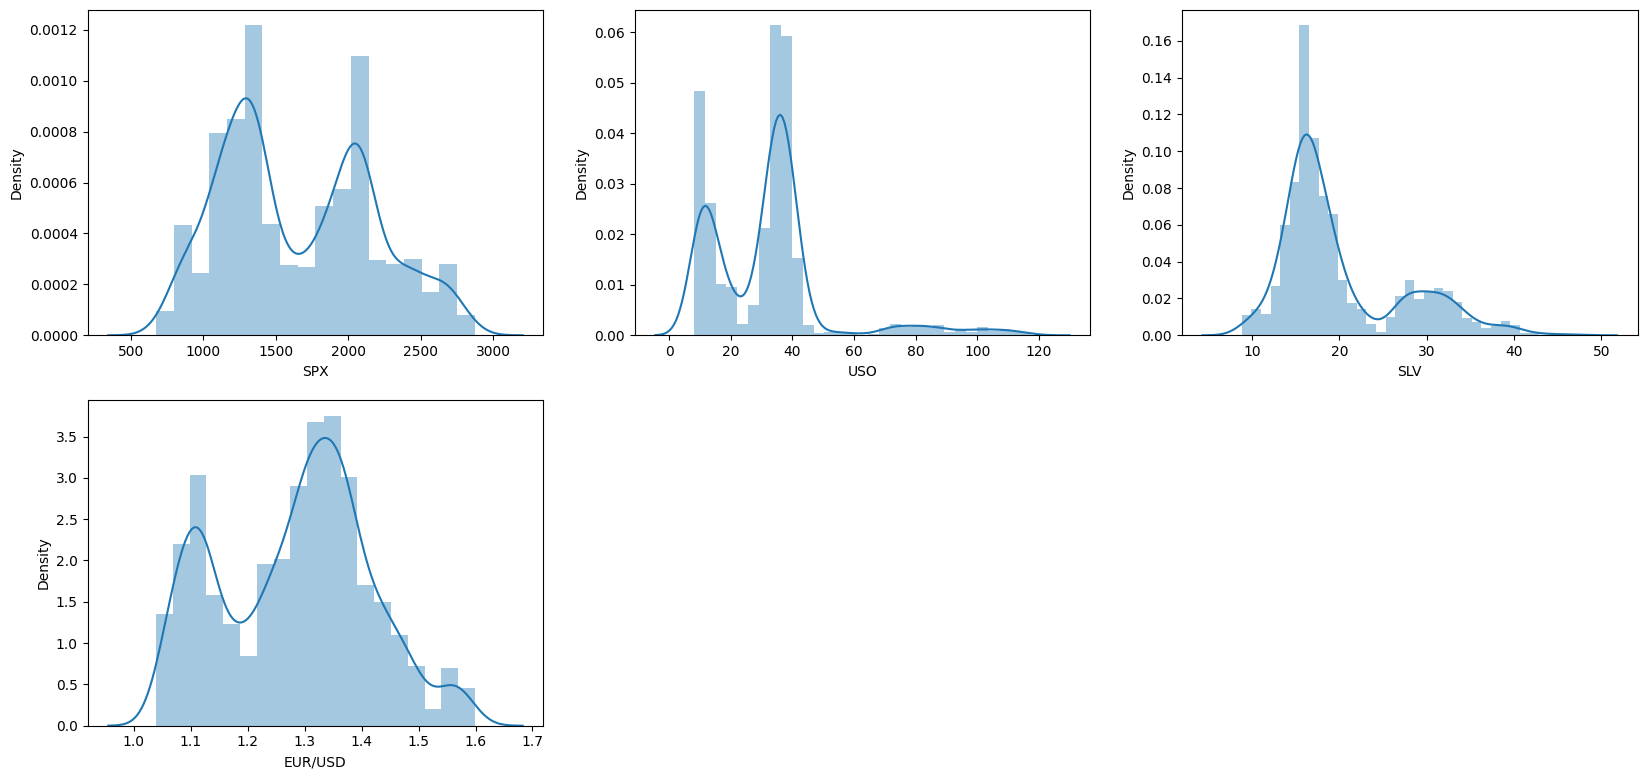

In [ ]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

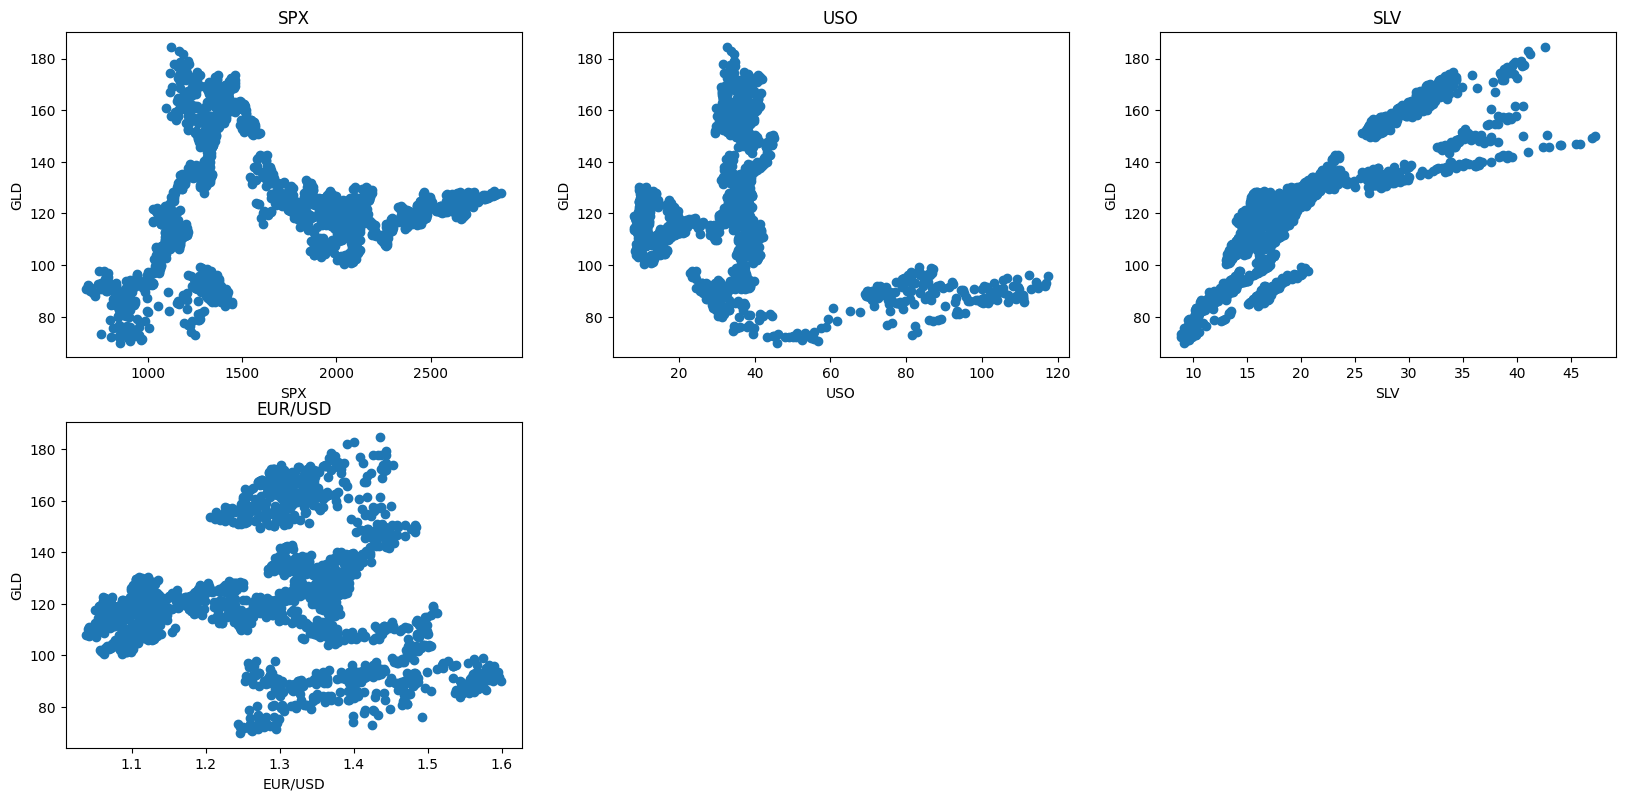

In [ ]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    data=df.copy()
    ax = plt.subplot(12,3,plotnumber)
    plt.scatter(data[feature],data['GLD'])
    plt.xlabel(feature)
    plt.ylabel('GLD')
    plt.title(feature)
    plotnumber+=1
plt.show()

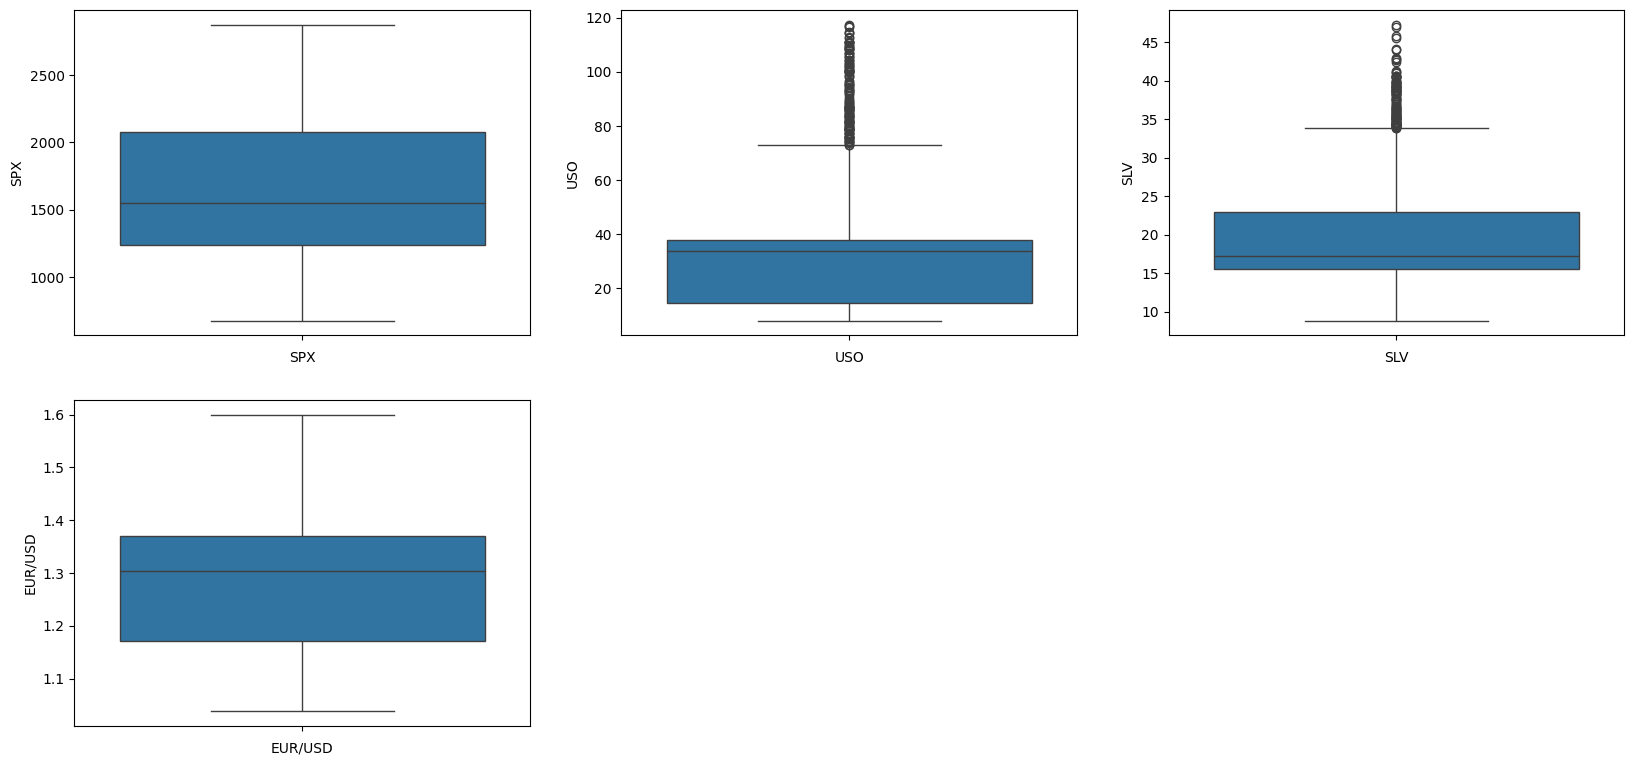

In [ ]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

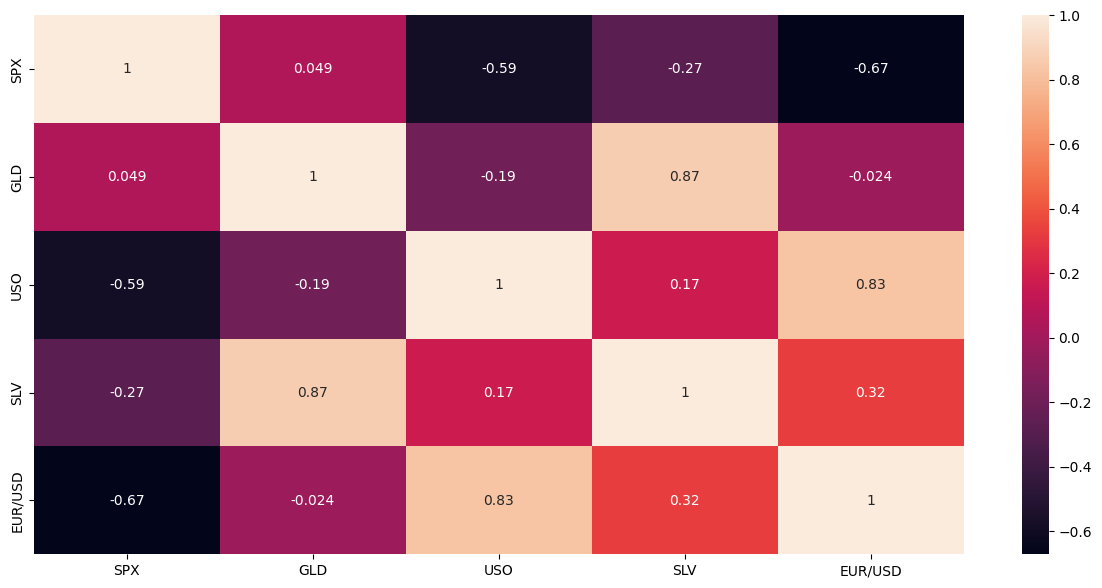

In [ ]:
df_numerical = df.drop('Date', axis=1)

cor_mat = df_numerical.corr()

fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)
plt.show()

In [ ]:
print (cor_mat['GLD'].sort_values(ascending=False), '\n')

GLD        1.000000
SLV        0.866632
SPX        0.049345
EUR/USD   -0.024375
USO       -0.186360
Name: GLD, dtype: float64 



In [ ]:
df2=df.copy()

In [ ]:
df2.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
df2.drop(['Date'],axis=1, inplace=True)

In [ ]:
X = df2.drop(['GLD'],axis=1)
y = df2['GLD']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
len(X_train)

1832

In [ ]:
len(X_test)

458

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

In [ ]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'RandomForestRegressor':{
        'model':RandomForestRegressor(),
        'params':{
            'n_estimators': [10, 50, 100, 130],
            'criterion': ['mse'],
            'max_depth': range(2, 4, 1),
            'max_features': ['auto', 'log2']
        }
    },
    'XGBRegressor':{
        'model':XGBRegressor(),
        'params':{
           'learning_rate': [0.5, 0.1, 0.01, 0.001],
            'max_depth': [2, 3],
            'n_estimators': [10, 50, 100, 200]
        }
    }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [31]:
pd.set_option('display.max_colwidth', 100)
find_best_model_using_gridsearchcv(X,y)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

,model,best_score,best_params
0,decision_tree,0.980859,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
1,RandomForestRegressor,0.910206,"{'criterion': 'squared_error', 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 130}"
2,XGBRegressor,0.987293,"{'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 200}"


In [32]:
model_xgb = XGBRegressor(learning_rate=0.5, max_depth=3, n_estimators=200)

In [33]:
model_xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [34]:
model_xgb.score(X_test,y_test)

0.9892690296698696

In [35]:
y_pred= model_xgb.predict(X_test)

In [36]:
y_pred

array([126.34505 , 116.311165, 138.90881 , 122.863914,  91.40356 ,
       154.75319 , 117.9976  , 112.74382 , 152.99512 , 104.82268 ,
       102.9867  , 119.58241 ,  90.55305 , 156.1799  , 121.3082  ,
       116.75704 ,  87.165764,  91.81471 ,  91.15352 , 125.10674 ,
        77.05139 , 118.08343 , 127.40098 , 176.75645 , 170.31609 ,
       142.38898 , 114.455765, 160.93712 , 130.64085 , 116.739265,
       110.04534 , 105.68394 , 128.42435 , 121.15888 ,  99.599686,
       120.28781 ,  86.73726 , 115.18382 , 127.36743 , 139.28445 ,
       108.12422 , 130.15685 , 103.476105, 136.23772 , 135.84383 ,
       149.99153 , 119.20501 , 157.76239 , 149.6722  , 127.24669 ,
       125.186066, 115.31793 , 119.722855, 118.4702  , 153.76889 ,
       122.86895 , 112.35148 ,  86.12174 , 155.96542 , 118.129845,
        88.522804, 114.253876,  85.509346, 146.81062 , 123.74285 ,
       127.39273 , 124.88603 , 121.010506, 169.1879  , 121.403496,
       125.74704 , 175.07112 , 122.59833 , 169.45615 , 120.426

In [37]:
y_test

,GLD
1255,128.789993
2100,115.620003
711,139.220001
1328,120.930000
53,93.040001
...,...
2085,120.360001
1362,129.130005
828,159.869995
567,117.339996
